<a href="https://colab.research.google.com/github/bsgreenb/math-tools/blob/master/Geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primitive Notions

Points ($ A $), Lines ($ \overleftrightarrow{AB} $), Line Segments ($ \overline{\rm AB} $), Rays ($ \overrightarrow{AB} $).  Lines can be parallel ($ A \parallel B $)

The notation for line-length is just the points like $ AB $ , to distinguish it from line segment itself.. 


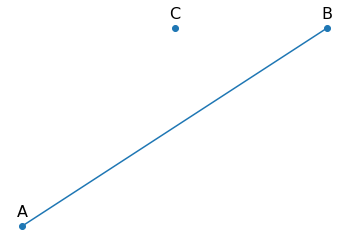

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


try:
  import google.colab
  import sys
  from os import path
  # We are in colab

  if not path.isdir('math-tools'):
    !git clone https://github.com/bsgreenb/math-tools.git
    sys.path.append('math-tools')
except:
  pass

from geometry import plot_line
from annotation import label
from angles import AngleAnnotation

#TODO: add a plotted line here

plt.plot([1, 2], [3, 4], marker = 'o')  
plt.plot([1.5], [4], marker='o', color='C0')
plt.axis('off')
label(plt, 'A',(1,3))
label(plt, 'B',(2,4))
label(plt, 'C',(1.5,4))

plt.show()

# Axioms

There are lots of these, just going to note the ones I use in later proofs

## Corresponding Angles Axiom

If a transversal ($ n $) intersects two parallel lines ($ l \parallel m $), then each pair of corresponding angles are congruent ($ \angle 1 \cong \angle 2 $).

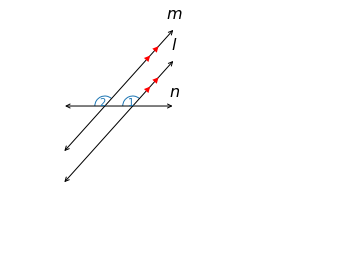

In [2]:
from angles import AngleAnnotation
from geometry import plot_parallel

fig, ax = plt.subplots()

p1 = (1,2)
p2 = (3,6)
plot_parallel(ax, p1, (2.6, 5.2), (2.75, 5.5), "red")
plot_line(ax, p1, p2, r"$ l $")
p3 = (1,3)
p4 = (3,7)
plot_line(ax, p3, p4, r"$ m $")
plot_parallel(ax, p3, (2.6, 6.2), (2.75, 6.5), "red")
# t points are for the transversal straight line
t1 = (1, 4.5)
t2 = (3, 4.5)
plot_line(ax, t1, t2, r"$ n $")

# This meets with l at x = 2.25 and m and x = 1.75.  both ys are 4.5 obvi
first_angle_location = (2.25, 4.5)
second_angle_location = (1.75, 4.5)

angle_1 = AngleAnnotation(first_angle_location, p2, t1, ax=ax, size=20, text=r"$1$", text_kw={"color": "C0"}, color="C0")
angle_2 = AngleAnnotation(second_angle_location, p4, t1, ax=ax, size=20, text=r"$2$", text_kw={"color": "C0"}, color="C0")

plt.xlim(0, 6)
plt.ylim(0, 7)
plt.axis('off')
plt.show()



Converse is also true: if a transversal through two lines creates a pair of corresponding angle, then the lines are parallel.

# Pythagorean Theorem Proof

Two major approaches to proving it, area based by constructing a composite polygon, or slicing/similarity based and solving from ratios.

Let's just show the easiest one to remember, Garfield's proof using a composite trapezoid.

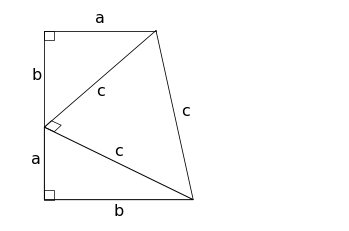

In [79]:
from matplotlib.patches import Polygon

# 3/4/5 is the smallest pythagorean triple
side_a_length = 3
side_b_length = 4
hypotenuse = 5

fig, ax = plt.subplots()

triangle1 = Polygon([(0,0), (0, side_a_length), (side_b_length, 0)], ec="black", fc=[0,0,0,0])
# Label the triangle lines at the midpoints with appropriate offsets.
offset = 8
label(ax, "a", (0, side_a_length / 2), (-offset, 0))
label(ax, "b", (side_b_length / 2, 0), (0, -2 * offset))
label(ax, "c", (side_b_length / 2, side_a_length / 2), (0, offset))
ax.add_patch(triangle1)

label(ax, "b", (0, (side_a_length +side_a_length + side_b_length) /2), (-offset, 0))
label(ax, "a", (side_a_length / 2, side_a_length + side_b_length), (0, offset))
label(ax, "c", (side_a_length / 2, (side_a_length +side_a_length + side_b_length) /2), (0, -2 * offset))
label(ax, "c", (side_b_length, (side_a_length + side_b_length) /2), (-1.5 * offset, 0))

# Add lines to form other triangles.
line_width = .8
ax.plot([0, 0], [side_a_length, side_a_length + side_b_length], color="black", lw=line_width)

ax.plot([0,side_a_length], [side_a_length + side_b_length, side_a_length + side_b_length], color="black", lw=line_width)

ax.plot([side_a_length, 0], [side_a_length + side_b_length, side_a_length], color="black", lw=line_width)
ax.plot([side_a_length, side_b_length], [side_a_length + side_b_length, 0], color="black", lw=line_width)

# Right Triangles
right1 = matplotlib.patches.Rectangle((0,0),0.25,0.4, fc=[0,0,0,0], ec="black", zorder=0, lw=.7)
ax.add_patch(right1)
right2 = matplotlib.patches.Rectangle((0,side_a_length + side_b_length),0.4,0.25, fc=[0,0,0,0], ec="black", zorder=0, lw=.7, angle=-90)
ax.add_patch(right2)
right3 = matplotlib.patches.Rectangle((0, side_a_length), 0.325, 0.325, fc=[0,0,0,0], ec="black", zorder=0, lw=.7, angle=-35)
ax.add_patch(right3)

plt.ylim(-1,8)
plt.xlim(-1,8)

plt.axis('off')
plt.show()

